# 1.1 수학과 파이썬 복습

## 1.1.1 벡터와 행렬

* 벡터 
<br> 크기와 방향을 가진 양
<br> 1차원 배열로 표현 가능

* 행렬
<br> 2차원 배열로 표현 가능

* 텐서
<br> 벡터와 행렬을 확장하여 N차원 배열로 표현한 것

In [1]:
import numpy as np

x = np.array([1, 2, 3])     # 벡터 생성
x. __class__        # 클래스 이름 표시

numpy.ndarray

np.array() 메서드는 넘파이의 다차원 배열 클래스인 np.ndarray 클래스를 생성한다.

In [2]:
x.shape     # 형상 확인

(3,)

In [3]:
x.ndim      # 차원 확인

1

In [4]:
W = np.array([[1, 2, 3], [4, 5, 6]])    # 행렬 생성
W.shape     # 형상 확인 

(2, 3)

In [5]:
W.ndim      # 차원 확인

2

## 1.1.2 행렬의 원소별 연산

* 원소별 연산(elementwise)
<br> 같은 위치의 원소끼리 연산이 이루어진다.

In [6]:
W = np.array([[1, 2, 3], [4, 5, 6]])
X = np.array([[0, 1, 2], [3, 4, 5]])
W + X

array([[ 1,  3,  5],
       [ 7,  9, 11]])

In [7]:
W * X

array([[ 0,  2,  6],
       [12, 20, 30]])

##1.1.3 브로드캐스트

* 브로드캐스트
<br> 형상이 다른 배열끼리도 연산이 가능하게하는 기능

In [8]:
A = np.array([[1, 2], [3, 4]])
A * 10

array([[10, 20],
       [30, 40]])

위의 코드를 보면 2x2행렬에 스칼라 값 10이 곱해졌다.
<br>이 때 스칼라 값 10이 브로드캐스트 기능에 의해 2x2행렬로 확장된 후 elementwise 연산이 수행된다.

In [9]:
A = np.array([[1, 2], [3, 4]])
b = np.array([10, 20])
A * b

array([[10, 40],
       [30, 80]])

##1.1.4 벡터의 내적과 행렬의 곱

* 벡터의 내적<br>
두 벡터에서 대응하는 원소들의 곱을 모두 더한 것<br>
Let $X = (x_1, x_2,\dots,x_n)$, $Y = (y_1, y_2,\dots,y_n)$. <br> 
Then $X \bullet Y = x_1y_1+x_2y_2 + \dots + x_ny_n$

NOTE
<br> 벡터의 내적은 '두 벡터가 얼마나 같은 방향을 향하고 있는가'를 나타낸다.
<br> 벡터의 길이가 1인 경우, 방향이 같을 경우 내적의 값이 1이고, 방향이 반대이면 내적의 값이 -1이다.

* 행렬의 곱
<br> 왼쪽 행렬의 행벡터와 오른쪽 행렬의 열벡터의 내적

In [10]:
# 벡터의 내적(np.dot 메서드 이용)
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
np.dot(a, b)    # 1*4 + 2*5 + 3*6 = 32

32

In [11]:
# 행렬의 곱(np.matmul 메서드 이용)
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
np.matmul(A, B)     # 1*5 + 2*7 = 19
                    # 1*6 + 2*8 = 22
                    # 3*5 + 4*7 = 43
                    # 3*6 + 4*8 = 50

array([[19, 22],
       [43, 50]])

In [12]:
# 행렬의 곱(np.dot 메서드 이용)
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
np.dot(A, B)     # 1*5 + 2*7 = 19
                    # 1*6 + 2*8 = 22
                    # 3*5 + 4*7 = 43
                    # 3*6 + 4*8 = 50

array([[19, 22],
       [43, 50]])

##1.1.5 행렬 형상 확인

* 형상 확인
<br> 행렬 A x 행렬 B = 행렬 C일 때,
<br> 행렬 C의 형상은 (행렬 A의 행 수) by (행렬 B의 열 수)

행렬의 곱에서는 대응하는 차원의 원소 수가 같아야 하므로 형상 확인이 매우 중요하다.

# 1.2 신경망의 추론

##1.2.1 신경망 추론 전체 그림

신경망은 입력층(input layer), 은닉층(hidden layer), 출력층(output layer)으로 이루어져 있다. 

각 층으로 향하는 화살표에는 (뉴런값 x 가충치 + b) 값에 활성화 함수를 씌운 값이 전달된다. (b는 편향, 생략가능)

In [13]:
# 완전연결계층에 의한 변환(미니배치 버전)

import numpy as np
W1 = np.random.randn(2,4)   # 가중치
b1 = np.random.randn(4)     # 편향
x = np.random.randn(10,2)   # 입력
h = np.matmul(x,W1) + b1    # (입력x가중치+편향) 계산

* np.random.randn(m,n)
<br> 평균0, 표준편차1의 가우시안 표준정규분포 난수를 matrix array(m,n) 형태로 생성 및 출력

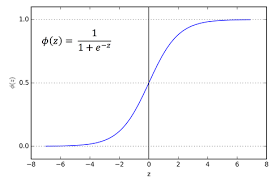

시그모이드 함수
* '비선형' 활성화 함수
* 임의의 실수를 입력받아 0에서 1 사이의 실수를 출력

In [14]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [15]:
# 위에서 완전연결계층에 의해 변환된 은닉층 뉴련을 변환시켜보자.
a = sigmoid(h)      # 출력된 a를 활성화(activation)이라고 한다.

In [16]:
# 지금까지의 과정을 총 정리해보자.
x = np.random.randn(10,2)
w1 = np.random.randn(2,4)
b1 = np.random.randn(4)
w2 = np.random.randn(4,3)
b2 = np.random.randn(3)

h = np.matmul(x,w1)+b1      # h:(10,4)
a = sigmoid(h)
s = np.matmul(a,w2)+b2      # s:(10,3)

s의 형상은 (10,3)으로 배치 사이즈가 10인 뉴런이 3개 존재한다는 뜻이다.

출력된 3차원 벡터의 각 차원은 각 클래스(뉴런)에 대응하는 '점수(score)'가 된다.
<br> 만약 분류 문제였다면, 출력층에서 가장 큰 값을 내뱉는 뉴런에 해당하는 클래스가 예측 결과가 되는 것이다.
> 여기서 점수란?
<br> 확률이 되기 전의 값을 뜻하며, softmax 함수에 입력하게되면 확률값을 얻을 수 있다.



## 1.2.2 계층으로 클래스화 및 순전파 구현

신경망에서 하는 처리를 계층(layer)으로 구현해보자.
* 규칙
<br> 모든 계층은 forward()와 backward() 메서드를 가진다.
<br> 모든 계층은 인스턴스 변수인 params와 grads를 가진다.

In [17]:
# 시그모이드 계층
import numpy as np

class Sigmoid:
    def __init__(self):     # 생성자
        self.params = []    # 학습하는 매개변수가 따로 없기 때문에 빈 리스트로 초기화
    
    def forward(self, x):
        return 1/(1+np.exp(-x))

In [23]:
# Affine 계층
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]    # 학습하는 가중치, 편향을 리스트에 저장
    
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        return out

In [24]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        # 3개의 계층 생성        
        I, H, O = input_size, hidden_size, output_size

        # 가중치와 편향 초기화
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)

        # 계층 생성
        self.layers = [
                       Affine(W1, b1),
                       Sigmoid(),
                       Affine(W2, b2)
        ]

        # 모든 가중치를 리스트에 모은다.
        self.params = []
        for layer in self.layers:
            self.params += layer.params     # * 리스트 덧셈 연산

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [25]:
# * 리스트 덧셈 연산
a = [1,2,3]
b = [4,5,6]
a+b

[1, 2, 3, 4, 5, 6]

In [26]:
x = np.random.randn(10,2)
model = TwoLayerNet(2,4,3)
s = model.predict(x)
print(s)    # 입력 데이터 x에 대한 점수 리스트

[[-1.22672017 -1.19408442 -1.65762946]
 [-1.20314133 -0.60218903 -1.65398991]
 [-1.25501671 -1.45117664 -1.58109269]
 [-1.32123613 -1.24802335 -1.60141779]
 [-1.36501467 -1.50412118 -1.47293663]
 [-1.36279343 -1.58166129 -1.54309682]
 [-1.3981711  -1.29831917 -1.58382528]
 [-1.31839944 -1.80982174 -1.49940164]
 [-1.42781745 -2.25860886 -1.40086185]
 [-1.77309146 -2.72748942 -1.23610424]]
